In [1]:
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git


Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 131 (delta 0), reused 0 (delta 0), pack-reused 129 (from 2)
Receiving objects: 100% (131/131), 1.13 MiB | 4.49 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [2]:
! cd stylegan2-ada-pytorch

In [4]:
!pip install click requests tqdm pyspng ninja imageio-ffmpeg==0.4.3

In [6]:
!wget https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl

--2025-06-18 09:52:40--  https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl
Resolving nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)... 13.35.37.105, 13.35.37.10, 13.35.37.106, ...
Connecting to nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)|13.35.37.105|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381624121 (364M) [binary/octet-stream]
Saving to: ‘ffhq.pkl’

ffhq.pkl            100%[===================>] 363.94M  39.3MB/s    in 5.8s    

2025-06-18 09:52:47 (62.7 MB/s) - ‘ffhq.pkl’ saved [381624121/381624121]



In [10]:
! ls

ffhq.pkl  sample_data  stylegan2-ada-pytorch


In [13]:
!python /content/stylegan2-ada-pytorch/generate.py --outdir=out --trunc=1 --seeds=2,12,42 --network=ffhq.pkl


Loading networks from "ffhq.pkl"...
Generating image for seed 2 (0/3) ...
Setting up PyTorch plugin "bias_act_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Generating image for seed 12 (1/3) ...
Generating image for seed 42 (2/3) ...


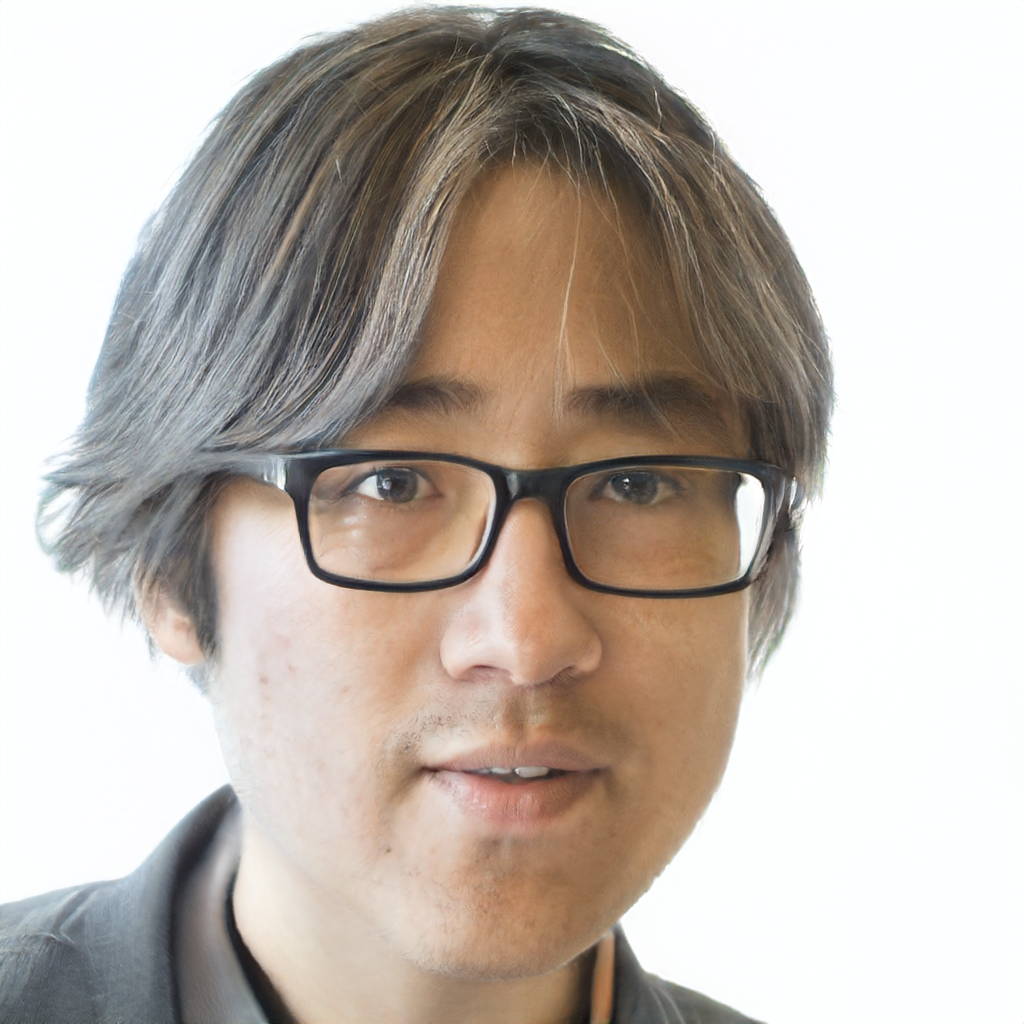

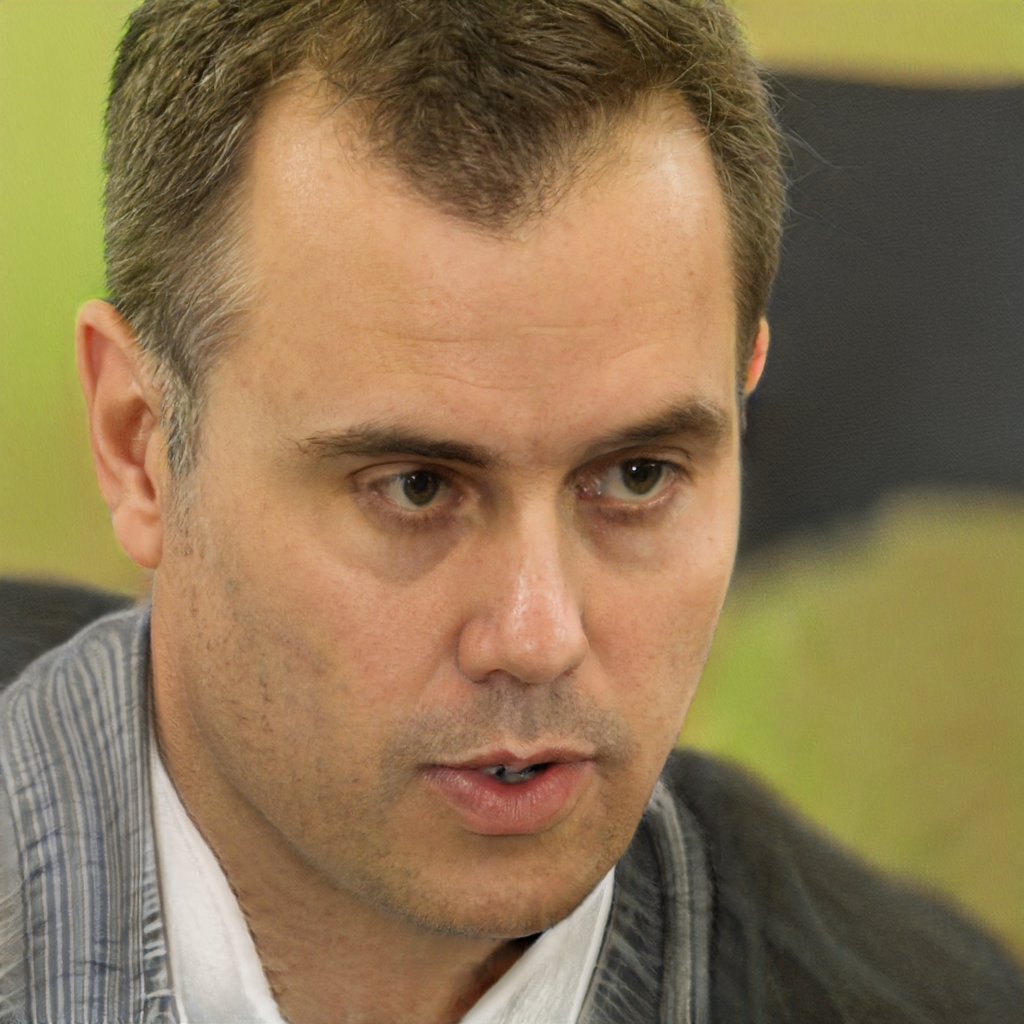

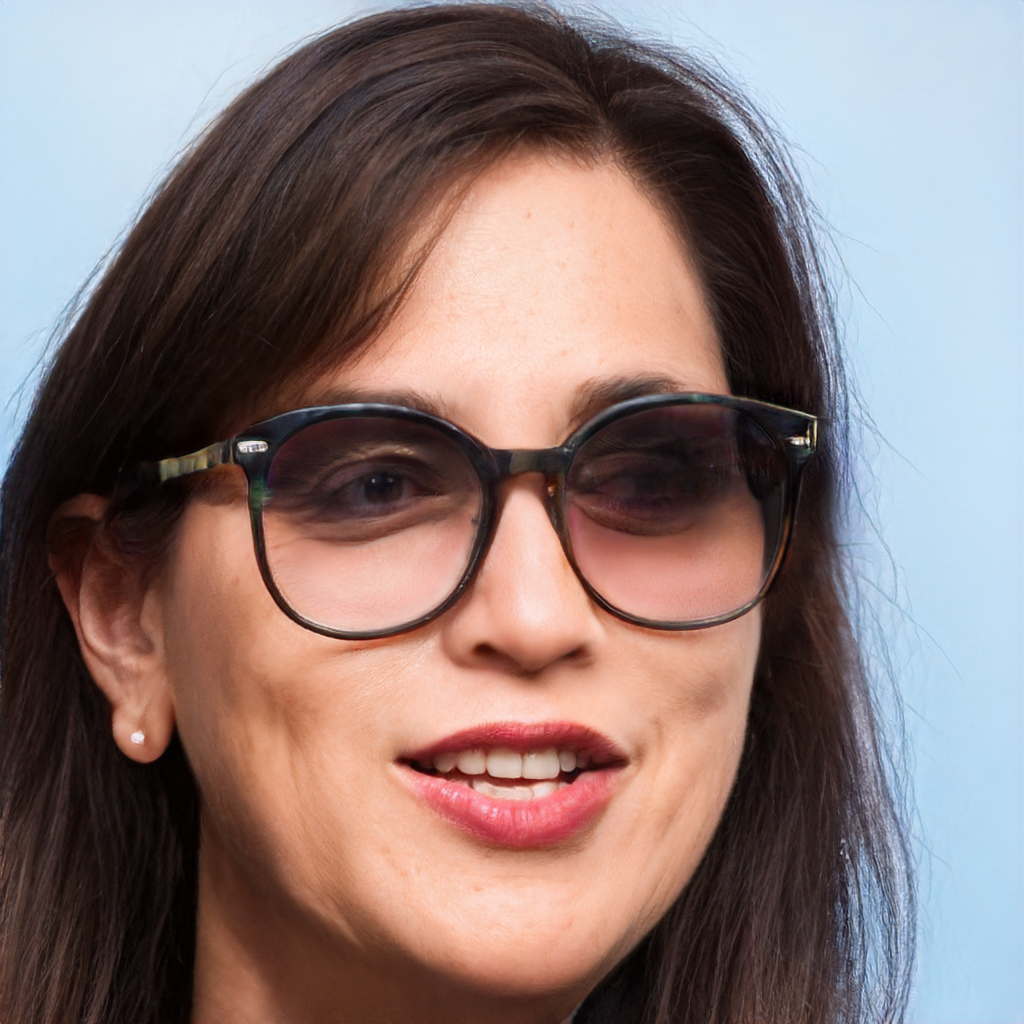

In [14]:
from IPython.display import Image, display
display(Image('out/seed0002.png'))
display(Image('out/seed0012.png'))
display(Image('out/seed0042.png'))


# **Sample 10 Random Latent Vectors in Z Spac**

In [34]:
import numpy as np

In [35]:
random_z_space=[]
for i in range(10):
    z = np.random.randn(512)  # One Z vector
    random_z_space.append(z)

# **Map Z to W Space**

In [36]:
%cd stylegan2-ada-pytorch

[Errno 2] No such file or directory: 'stylegan2-ada-pytorch'
/content/stylegan2-ada-pytorch


In [37]:
import dnnlib
import legacy
import torch
import numpy as np

device = torch.device('cuda')

with open('/content/ffhq.pkl', 'rb') as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device)


In [38]:
z_array = np.stack(random_z_space)
z_tensor = torch.from_numpy(z_array).to(device)

creating the w+ *vector*

In [42]:
w_plus = G.mapping(z_tensor, None)

In [43]:
print(w_plus.shape)

torch.Size([10, 18, 512])


# **Generate Faces from Latent Vectors**

In [44]:
images = G.synthesis(w)

Setting up PyTorch plugin "upfirdn2d_plugin"... 

/usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(


Done.


taking the pixel value to range [0,225]

In [45]:
images = (images.clamp(-1, 1) + 1) * (255 / 2)
images = images.permute(0, 2, 3, 1).to(torch.uint8).cpu().numpy()

saving the files

In [46]:
import imageio
import os

os.makedirs('out/images', exist_ok=True)
np.save('out/random_z.npy', random_z_space)
np.save('out/random_w.npy', w.detach().cpu().numpy())
np.save('out/random_wplus.npy', w_plus.detach().cpu().numpy())

# Save images
for i, img in enumerate(images):
    imageio.imwrite(f'out/images/image_{i:02d}.png', img)


Displaying the images

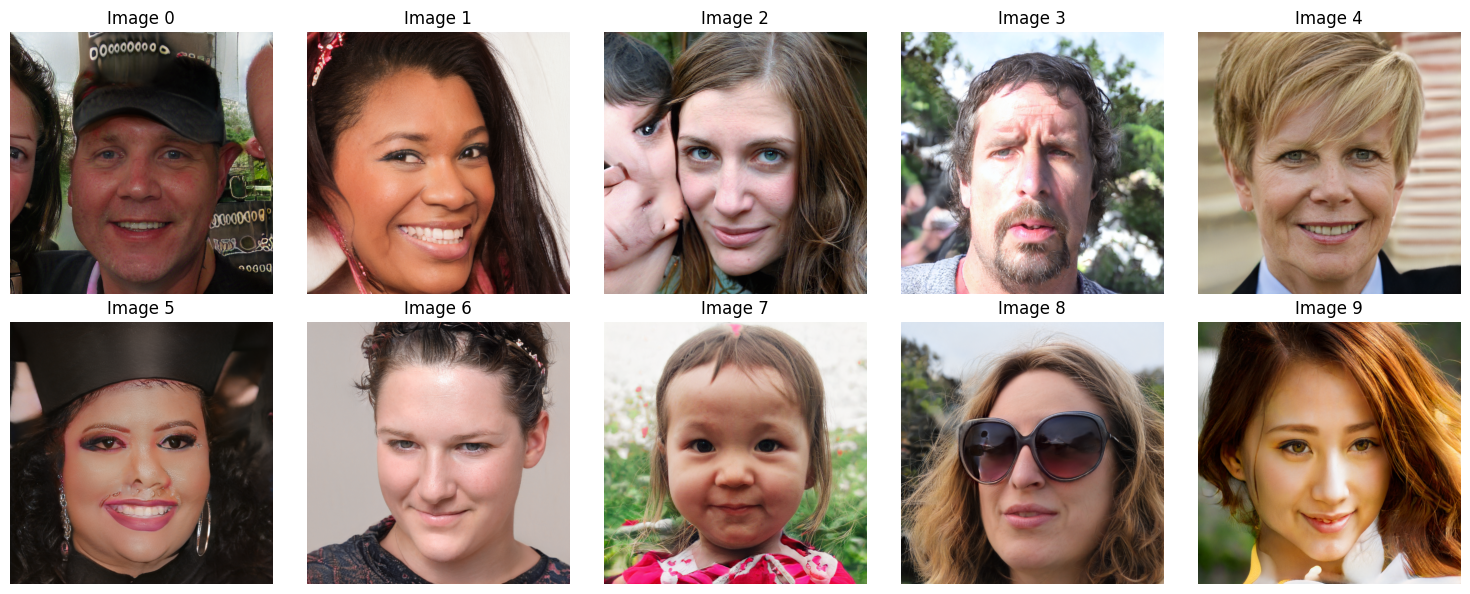

In [47]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob


image_paths = sorted(glob.glob('out/images/*.png'))


num_images = len(image_paths)
cols = 5
rows = (num_images + cols - 1) // cols


plt.figure(figsize=(15, 6))

for i, img_path in enumerate(image_paths):
    img = mpimg.imread(img_path)
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Image {i}")

plt.tight_layout()
plt.show()


Downloading the files from google colab

In [48]:
!zip -r out.zip out/
from google.colab import files
files.download('out.zip')

  adding: out/ (stored 0%)
  adding: out/random_wplus.npy (deflated 94%)
  adding: out/images/ (stored 0%)
  adding: out/images/image_04.png (deflated 0%)
  adding: out/images/image_09.png (deflated 0%)
  adding: out/images/image_02.png (deflated 0%)
  adding: out/images/image_00.png (deflated 0%)
  adding: out/images/image_07.png (deflated 0%)
  adding: out/images/image_05.png (deflated 0%)
  adding: out/images/image_03.png (deflated 0%)
  adding: out/images/image_06.png (deflated 0%)
  adding: out/images/image_01.png (deflated 0%)
  adding: out/images/image_08.png (deflated 0%)
  adding: out/random_z.npy (deflated 4%)
  adding: out/random_w.npy (deflated 94%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>